In [52]:
import pandas as pd
import numpy as np
import json
import re

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from dateutil.relativedelta import relativedelta

In [2]:
with open ("players (1).json") as f:
    data = json.load(f)

In [3]:
dataset = pd.DataFrame(data)

In [4]:
dataset.sample(10)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
1074,"{'name': 'Germany', 'id': '276', 'alpha3code':...",82,Oliver,,Baumann,2482,1990-06-02,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Germany', 'id': '276', 'alpha3code':...",14979,right,O. Baumann,null
1986,"{'name': 'Guadeloupe', 'id': '312', 'alpha3cod...",80,Daniel,,Congr\u00e9,3787,1985-04-05,185,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",25786,right,D. Congr\u00e9,null
949,"{'name': 'Mexico', 'id': '484', 'alpha3code': ...",65,Marco Jhonfai,,Fabi\u00e1n De La Mora,2462,1989-07-21,170,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Mexico', 'id': '484', 'alpha3code': ...",112253,right,M. Fabi\u00e1n,15473
2033,"{'name': 'Benin', 'id': '204', 'alpha3code': '...",69,Jonathan,,Tinhan,3795,1989-06-01,178,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': '250', 'alpha3code': ...",26006,right,J. Tinhan,null
2454,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",85,Predrag,,Rajkovi\u0107,13270,1995-10-31,191,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",140064,right,P. Rajkovi\u0107,17322
3583,"{'name': 'Northern Ireland', 'id': 0, 'alpha3c...",84,Luke,,McCullough,1661,1994-02-15,188,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Northern Ireland', 'id': 0, 'alpha3c...",239982,right,L. McCullough,null
1568,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",69,Luciano,,Vietto,674,1993-12-05,173,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Argentina', 'id': '32', 'alpha3code'...",86307,right,L. Vietto,null
1192,"{'name': 'Germany', 'id': '276', 'alpha3code':...",67,Dominik,,Kaiser,2975,1988-09-16,171,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",15810,right,D. Kaiser,null
1189,"{'name': 'United States', 'id': '840', 'alpha3...",74,Fabian,,Johnson,2454,1987-12-11,183,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",15804,right,F. Johnson,8134
1593,"{'name': 'Indonesia', 'id': '360', 'alpha3code...",77,Radja,,Nainggolan,3158,1988-05-04,176,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",20879,right,R. Nainggolan,null


In [5]:
with open("teams.json") as t:
    data2 = json.load(t)

In [6]:
teams = pd.DataFrame(data2)

In [7]:
teams.sample(10)

,city,name,wyId,officialName,area,type
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
100,Istanbul,Turkey,4687,Turkey,"{'name': 'Turkey', 'id': 792, 'alpha3code': 'T...",national
51,Formello,Lazio,3162,SS Lazio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
127,Reykjav\u00edk,Iceland,7839,Iceland,"{'name': 'Iceland', 'id': 352, 'alpha3code': '...",national
59,Girona,Girona,756,Girona FC,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
132,Dakar,Senegal,19314,Senegal,"{'name': 'Senegal', 'id': 686, 'alpha3code': '...",national
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
71,Monaco,Monaco,19830,AS Monaco FC,"{'name': 'Monaco', 'id': '492', 'alpha3code': ...",club
95,Sevilla,Sevilla,680,Sevilla FC,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national


In [8]:
teams[teams["wyId"] == 3767]

,city,name,wyId,officialName,area,type
12,Paris,PSG,3767,Paris Saint-Germain FC,"{'name': 'France', 'id': '250', 'alpha3code': ...",club


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passportArea           3603 non-null   object
 1   weight                 3603 non-null   int64 
 2   firstName              3603 non-null   object
 3   middleName             3603 non-null   object
 4   lastName               3603 non-null   object
 5   currentTeamId          3512 non-null   object
 6   birthDate              3603 non-null   object
 7   height                 3603 non-null   int64 
 8   role                   3603 non-null   object
 9   birthArea              3603 non-null   object
 10  wyId                   3603 non-null   int64 
 11  foot                   3603 non-null   object
 12  shortName              3603 non-null   object
 13  currentNationalTeamId  3603 non-null   object
dtypes: int64(3), object(11)
memory usage: 394.2+ KB


In [10]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          142 non-null    object
 1   name          142 non-null    object
 2   wyId          142 non-null    int64 
 3   officialName  142 non-null    object
 4   area          142 non-null    object
 5   type          142 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


In [11]:
# Create column with passport area, role and birth area
def getName(dataset):
    return dataset['name']

In [12]:
dataset['PassportArea'] = dataset['passportArea'].apply(getName)
dataset['Role'] = dataset['role'].apply(getName)
dataset['BirthArea'] = dataset['birthArea'].apply(getName)

In [13]:
dataset.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId,PassportArea,Role,BirthArea
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687,Turkey,Goalkeeper,Turkey
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423,Senegal,Defender,France
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null,France,Goalkeeper,France
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314,Senegal,Midfielder,France
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null,France,Defender,France


In [14]:
# Create age column
dataset["birthDate"] = pd.to_datetime(dataset["birthDate"])
dataset['Approximate age'] = [relativedelta(pd.to_datetime('2018'), d).years for d in dataset['birthDate']]

In [15]:
dataset.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId,PassportArea,Role,BirthArea,Approximate age
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687,Turkey,Goalkeeper,Turkey,28
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423,Senegal,Defender,France,18
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null,France,Goalkeeper,France,19
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314,Senegal,Midfielder,France,27
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null,France,Defender,France,18


In [16]:
# Drop old columet
dataset.drop(columns =['passportArea', 'role', 'birthArea'], inplace = True)

In [17]:
dataset.sample(10)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,PassportArea,Role,BirthArea,Approximate age
2582,75,Rafael,,M\u00e1rquez \u00c1lvarez,null,1979-02-13,184,59003,right,R. M\u00e1rquez,null,Spain,Defender,Mexico,38
2247,91,Nikola,,Milenkovi\u0107,3176,1997-10-12,195,424241,right,N. Milenkovi\u0107,17322,Serbia,Defender,Serbia,20
3419,85,Alexandre,,Olliero,3770,1996-02-15,193,366573,right,A. Olliero,null,France,Goalkeeper,France,21
1812,70,Zaydou,,Youssouf,3772,1999-07-11,178,482491,left,Z. Youssouf,null,Comoros,Midfielder,France,18
1578,82,Nereo,,Champagne,712,1985-01-20,189,86350,right,N. Champagne,null,Italy,Goalkeeper,Argentina,32
3454,78,Ignatius,,Kpene Ganago,3775,1999-02-16,176,521939,right,I. Ganago,null,Cameroon,Forward,Cameroon,18
1761,77,Fabio,,Pisacane,3173,1986-01-28,178,22732,right,F. Pisacane,null,Italy,Defender,Italy,31
2236,65,Gelson Dany,,Batalha Martins,679,1995-05-11,173,227059,right,Gelson Martins,9905,Portugal,Forward,Cape Verde Islands,22
713,83,Kyle,,Walker,1625,1990-05-28,183,8277,right,K. Walker,2413,England,Defender,England,27
3013,94,Kyle,,Bartley,1627,1991-05-22,194,61979,right,K. Bartley,null,Jamaica,Defender,England,26


In [18]:
#Area name for teams dataset
teams['Area'] = teams['area'].apply(getName)

In [19]:
teams.head()

,city,name,wyId,officialName,area,type,Area
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain


In [20]:
teams.drop(columns = ['area'], inplace = True)

In [21]:
teams.sample(5)

,city,name,wyId,officialName,type,Area
48,Metz,Metz,3777,FC Metz,club,France
132,Dakar,Senegal,19314,Senegal,national,Senegal
4,Valencia,Levante,695,Levante UD,club,Spain
71,Monaco,Monaco,19830,AS Monaco FC,club,Monaco
42,Dijon,Dijon,3804,Dijon FCO,club,France


In [22]:
# clean text

def CleanTxt (text):
    text = re.sub(r'[^\x00-\x7f]+|[-()"#/@;:<>{}`+=&~|.!?,^]+', ' ', text)
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r"\\/", '', text)
    
    return text

In [23]:
teams['city'] = teams['city'].apply(CleanTxt)
teams['name'] = teams['name'].apply(CleanTxt)
teams['officialName'] = teams['officialName'].apply(CleanTxt)

In [24]:
teams.sample(10)

,city,name,wyId,officialName,type,Area
49,Genova,Sampdoria,3164,UC Sampdoria,club,Italy
68,London,Tottenham Hotspur,1624,Tottenham Hotspur FC,club,England
128,Zagreb,Croatia,9598,Croatia,national,Croatia
79,Manchester,Manchester United,1611,Manchester United FC,club,England
76,K u f ln,K u f ln,2463,FC K u f ln,club,Germany
85,Caen,Caen,3783,Stade Malherbe Caen,club,France
75,Southampton Hampshire,Southampton,1619,Southampton FC,club,England
87,Montpellier,Montpellier,3787,Montpellier HSC,club,France
44,Wolfsburg,Wolfsburg,2451,VfL Wolfsburg,club,Germany
115,Belfast,Northern Ireland,10962,Northern Ireland,national,Northern Ireland


In [25]:
dataset['firstName'] = dataset['firstName'].apply(CleanTxt)
dataset['lastName'] = dataset['lastName'].apply(CleanTxt)
dataset['shortName'] = dataset['shortName'].apply(CleanTxt)

In [26]:
dataset.sample(10)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,PassportArea,Role,BirthArea,Approximate age
245,60,Jes u fas,,Navas Gonz u e lez,680,1985-11-21,172,3474,right,Jes u fas Navas,null,Spain,Midfielder,Spain,32
1324,71,Brandon,,Thomas Llamas,3774,1995-02-04,177,247162,right,Brandon,null,Spain,Forward,Spain,22
2070,88,Jessy,,Moulin,3782,1986-01-13,185,26216,right,J Moulin,null,France,Goalkeeper,France,31
1018,81,Stefan,,Kie u dfling,None,1984-01-25,191,14788,right,S Kie u dfling,null,Germany,Forward,Germany,33
160,74,Daniel,,Parejo Mu u f oz,674,1989-04-16,182,3286,right,Dani Parejo,null,Spain,Midfielder,Spain,28
3408,70,James Edward,,Lea Siliki,3774,1996-06-12,183,325781,left,J Lea Siliki,null,Cameroon,Midfielder,France,21
2542,73,Edson Omar,,u c lvarez Vel u e zquez,15405,1997-10-24,185,448210,right,E u c lvarez,15473,Mexico,Defender,Mexico,20
2685,78,Karamoko,,Ciss u e,3194,1988-11-14,184,21235,right,K Ciss u e,null,Italy,Forward,Guinea,29
1628,83,Paolo,,Cannavaro,None,1981-06-26,185,21162,right,P Cannavaro,null,Italy,Defender,Italy,36
2628,79,Motaz Ali Hassan,,Hawsawi,16465,1992-02-17,180,139391,right,Motaz Hawsawi,16521,Saudi Arabia,Defender,Saudi Arabia,25


In [27]:
dataset.shape

(3603, 15)

In [28]:
teams.shape

(142, 6)

In [29]:
player_teams = pd.merge(dataset, teams, how ='inner', left_on = 'currentTeamId', right_on = 'wyId')

In [30]:
player_teams.sample(10)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId_x,foot,shortName,...,PassportArea,Role,BirthArea,Approximate age,city,name,wyId_y,officialName,type,Area
1699,91,Nikola,,Milenkovi u,3176,1997-10-12,195,424241,right,N Milenkovi u,...,Serbia,Defender,Serbia,20,Firenze,Fiorentina,3176,ACF Fiorentina,club,Italy
1218,73,Romain,,Danz u e,3774,1986-07-03,184,25637,right,R Danz u e,...,France,Defender,France,31,Rennes,Rennes,3774,Stade Rennais FC,club,France
396,71,Andrija,,Bali u,3163,1997-08-11,180,300669,right,A Bali u,...,Croatia,Midfielder,Croatia,20,Udine,Udinese,3163,Udinese Calcio,club,Italy
2071,82,David,,de Gea Quintana,1611,1990-11-07,193,7910,right,David de Gea,...,Spain,Goalkeeper,Spain,27,Manchester,Manchester United,1611,Manchester United FC,club,England
796,81,Justin,,Hoogma,2482,1998-06-11,190,414667,left,J Hoogma,...,Netherlands,Defender,Netherlands,19,Sinsheim,Hoffenheim,2482,TSG Hoffenheim,club,Germany
1029,72,Eloi,,Amagat Arimany,756,1985-05-21,180,167104,right,Eloi Amagat,...,Spain,Midfielder,Spain,32,Girona,Girona,756,Girona FC,club,Spain
928,76,Thilo,,Kehrer,2449,1996-09-21,186,235606,right,T Kehrer,...,Burundi,Defender,Germany,21,Gelsenkirchen,Schalke,2449,FC Schalke,club,Germany
980,76,Diego,,Rico Salguero,712,1993-02-23,183,169002,left,Diego Rico,...,Spain,Defender,Spain,24,Legan u e s,Legan u e s,712,CD Legan u e s,club,Spain
1836,73,Mart u edn,,Montoya Torralbo,674,1991-04-14,175,3339,right,Montoya,...,Spain,Defender,Spain,26,Valencia,Valencia,674,Valencia Club de F u fatbol,club,Spain
2051,67,David Josu u e,,Jim u e nez Silva,1625,1986-01-08,173,8317,left,David Silva,...,Spain,Midfielder,Spain,31,Manchester,Manchester City,1625,Manchester City FC,club,England


In [31]:
player_teams.rename(columns = {'wyId_x': 'playerId', 'wyId_y': 'teamId'}, inplace = True)

In [32]:
player_teams.sample(5)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,...,PassportArea,Role,BirthArea,Approximate age,city,name,teamId,officialName,type,Area
2213,80,Stephan Kofi,,Ambrosius,2450,1998-12-18,182,391603,right,S Ambrosius,...,Ghana,Defender,Germany,19,Hamburg,Hamburger SV,2450,Hamburger SV,club,Germany
2221,72,Pedro Miguel,,Almeida Lopes Pereira,3193,1998-01-22,182,345740,right,Pedro Pereira,...,Portugal,Defender,Portugal,19,Genova,Genoa,3193,Genoa CFC,club,Italy
1686,73,Valentin,,Eysseric,3176,1992-03-25,181,149076,right,V Eysseric,...,France,Midfielder,France,25,Firenze,Fiorentina,3176,ACF Fiorentina,club,Italy
2162,62,Alex,,Pritchard,1673,1993-05-03,171,8290,right,A Pritchard,...,England,Midfielder,England,24,Huddersfield West Yorkshire,Huddersfield Town,1673,Huddersfield Town FC,club,England
789,73,Lukas,,Rupp,2482,1991-01-08,178,15942,right,L Rupp,...,Germany,Midfielder,Germany,26,Sinsheim,Hoffenheim,2482,TSG Hoffenheim,club,Germany


In [33]:
xg_data = pd.read_csv("xG Values.csv")

In [34]:
xg_data.head()

,Unnamed: 0,Goal,xG,Distance,Angle Degrees,header,Right Foot,Left Foot,playerid,teamid
0,46,1,0.474149,14.007655,26.770923,0,1,0,25413,1609
1,62,0,0.522491,15.808608,25.986925,0,0,1,26150,1631
2,91,1,0.098509,4.414703,78.788301,1,0,0,14763,1631
3,128,0,0.735412,23.057235,15.737204,0,0,1,7868,1609
4,249,0,0.848543,29.563872,12.585866,0,1,0,7868,1609


In [35]:
xg_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [36]:
xg_data.head()

,Goal,xG,Distance,Angle Degrees,header,Right Foot,Left Foot,playerid,teamid
0,1,0.474149,14.007655,26.770923,0,1,0,25413,1609
1,0,0.522491,15.808608,25.986925,0,0,1,26150,1631
2,1,0.098509,4.414703,78.788301,1,0,0,14763,1631
3,0,0.735412,23.057235,15.737204,0,0,1,7868,1609
4,0,0.848543,29.563872,12.585866,0,1,0,7868,1609


In [37]:
all_data = pd.merge(player_teams, xg_data, how = 'inner', left_on = 'playerId', right_on = 'playerid')

In [41]:
all_data.sample(20)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,...,Area,Goal,xG,Distance,Angle Degrees,header,Right Foot,Left Foot,playerid,teamid
8884,72,Ibai,,G u f mez P u e rez,696,1989-11-11,177,3423,right,Ibai G u f mez,...,Spain,0,0.866666,31.200040,13.070789,0,0,1,3423,696
8192,84,Gilbert Gianelli,,Imbula Wanga,3780,1992-09-12,186,25942,left,G Imbula,...,France,0,0.601494,17.455569,18.932259,0,0,1,25942,3780
3138,72,Fay u e al,,Fajr,3783,1988-08-01,178,25888,right,F Fajr,...,France,0,0.586032,17.435966,21.638588,0,1,0,25888,698
26460,88,Marcus,,Thuram,3785,1997-08-06,192,301017,right,M Thuram,...,France,0,0.675606,20.026233,15.513438,0,1,0,301017,3785
33556,72,Andrea,,Belotti,3185,1993-12-20,181,21234,right,A Belotti,...,Italy,0,0.190852,5.202653,48.349808,1,0,0,21234,3185
26888,78,Gil,,Basti u e o Dias,3176,1996-09-28,183,338249,left,Gil Dias,...,Italy,0,0.706020,21.259842,14.728023,0,0,1,338249,3176
26443,88,Marcus,,Thuram,3785,1997-08-06,192,301017,right,M Thuram,...,France,0,0.716914,22.035174,15.468703,0,0,1,301017,3785
33491,74,Adem,,Ljaji u,3185,1991-09-29,182,20941,right,A Ljaji u,...,Italy,0,0.525862,15.674297,24.855237,0,1,0,20941,3185
26722,76,Yannis,,Salibur,3785,1991-01-21,177,26604,left,Y Salibur,...,France,0,0.915580,35.794553,10.307516,0,0,1,26604,3785
11114,79,Josip,,Ili u di u,3172,1988-01-29,190,20820,left,J Ili u di u,...,Italy,0,0.728902,23.189903,17.872605,0,0,1,20820,3172


In [39]:
all_data.shape

(40850, 30)

In [40]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40850 entries, 0 to 40849
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   weight                 40850 non-null  int64         
 1   firstName              40850 non-null  object        
 2   middleName             40850 non-null  object        
 3   lastName               40850 non-null  object        
 4   currentTeamId          40850 non-null  object        
 5   birthDate              40850 non-null  datetime64[ns]
 6   height                 40850 non-null  int64         
 7   playerId               40850 non-null  int64         
 8   foot                   40850 non-null  object        
 9   shortName              40850 non-null  object        
 10  currentNationalTeamId  40850 non-null  object        
 11  PassportArea           40850 non-null  object        
 12  Role                   40850 non-null  object        
 13  B

In [44]:
all_data[all_data['playerId'] == 7936].head()

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,playerId,foot,shortName,...,Area,Goal,xG,Distance,Angle Degrees,header,Right Foot,Left Foot,playerid,teamid
35072,84,Paul,,Pogba,1611,1993-03-15,191,7936,right,P Pogba,...,England,0,0.636320,18.700898,17.741433,0,1,0,7936,1611
35073,84,Paul,,Pogba,1611,1993-03-15,191,7936,right,P Pogba,...,England,0,0.627795,17.842716,15.494974,0,1,0,7936,1611
35074,84,Paul,,Pogba,1611,1993-03-15,191,7936,right,P Pogba,...,England,1,0.870895,31.524405,12.808574,0,1,0,7936,1611
35075,84,Paul,,Pogba,1611,1993-03-15,191,7936,right,P Pogba,...,England,0,0.128994,5.293855,69.159474,1,0,0,7936,1611
35076,84,Paul,,Pogba,1611,1993-03-15,191,7936,right,P Pogba,...,England,1,0.403522,10.982172,26.648679,0,1,0,7936,1611


In [47]:
all_data.duplicated().sum()

420

In [48]:
all_data.drop_duplicates(inplace = True)

In [49]:
all_data.duplicated().sum()

0

In [50]:
all_data.shape

(40430, 30)

In [51]:
all_data['Role'].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

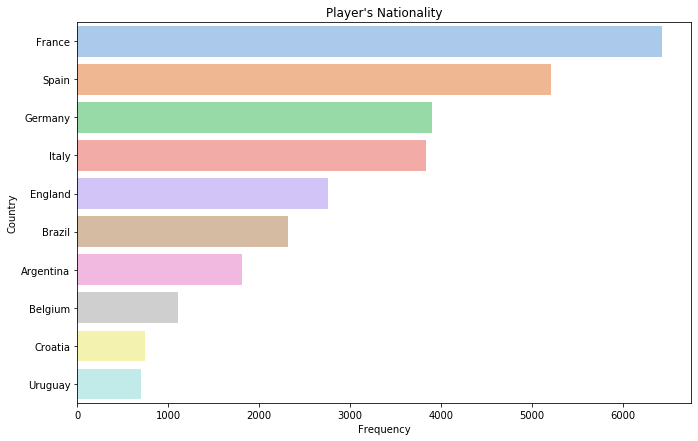

In [88]:
#Where are most of the players from?
fig, ax = plt.subplots(figsize = (11,7))

sns.barplot(all_data['BirthArea'].value_counts()[:10].values, all_data['BirthArea'].value_counts()[:10].index, palette = 'pastel', orient = 'h')

plt.title("Player's Nationality")
plt.ylabel("Country")
plt.xlabel("Frequency")

plt.show()

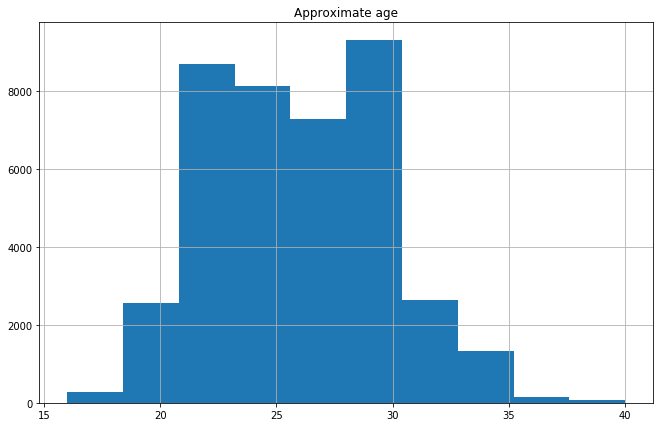

In [60]:
# What is the age distribution of the players?
fig, ax = plt.subplots(figsize = (11,7))

all_data.hist("Approximate age" , ax = ax)

plt.show()

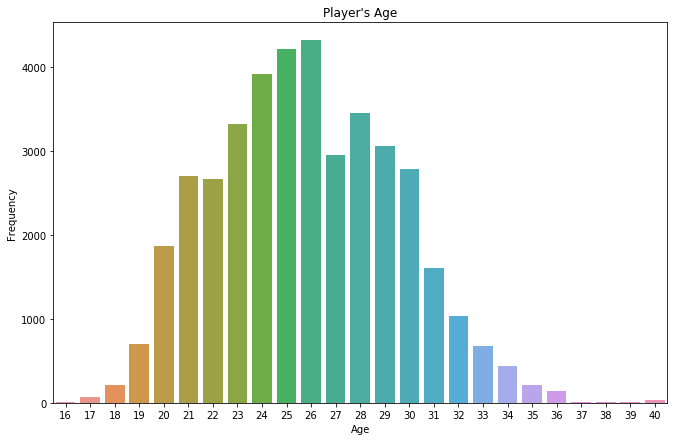

In [82]:
fig , ax = plt.subplots(figsize = (11,7))

sns.barplot(all_data['Approximate age'].value_counts().index,all_data['Approximate age'].value_counts().values)

plt.title("Player's Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

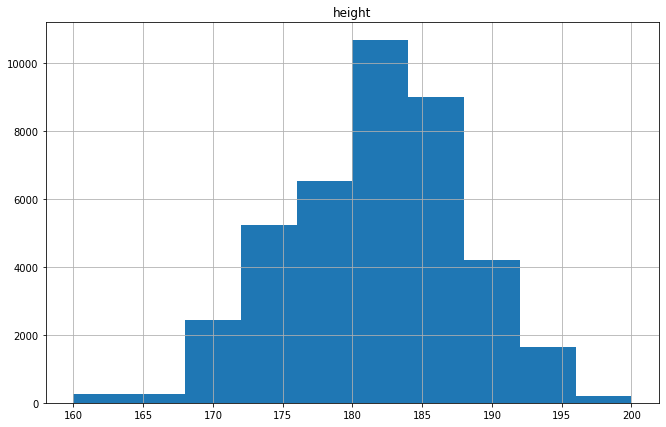

In [69]:
#What is the height distribution of the players?
fig , ax = plt.subplots(figsize = (11,7))

all_data.hist("height" ,range = (160, 200), ax = ax)

plt.show()

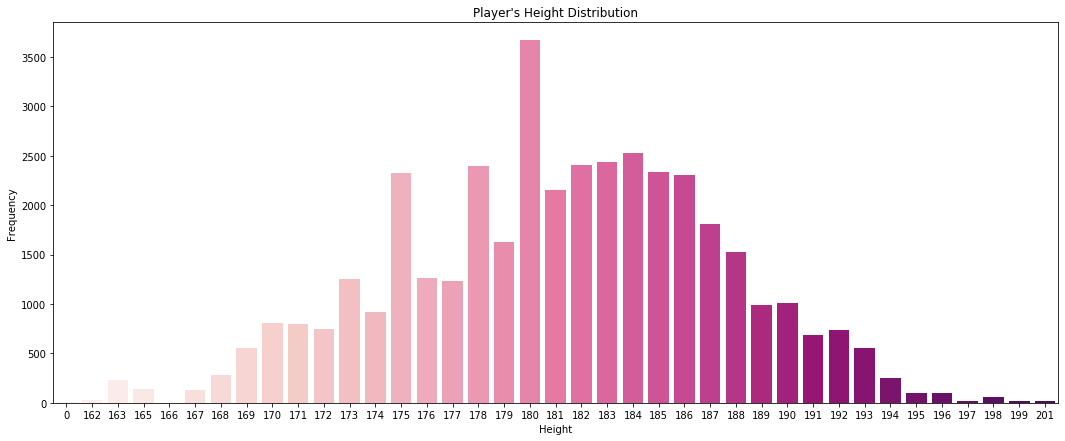

In [100]:
fig , ax = plt.subplots(figsize = (18,7))

sns.barplot(all_data['height'].value_counts().index,all_data['height'].value_counts().values, palette = 'RdPu')

plt.title("Player's Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.show()

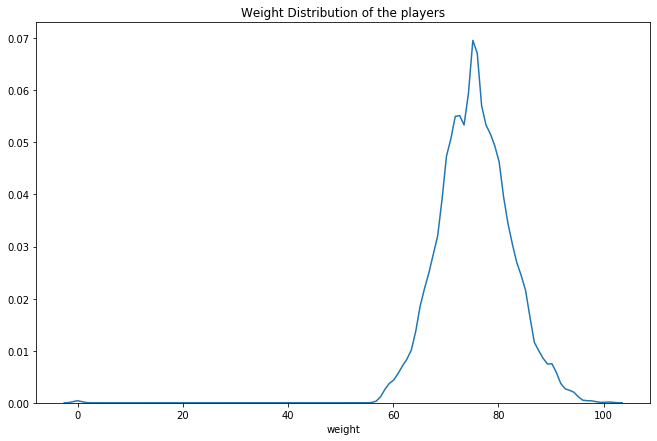

In [103]:
# Weight distribution of the players
fig, ax = plt.subplots(figsize = (11,7))

sns.distplot(all_data['weight'] ,hist=False)

plt.title("Weight Distribution of the players")

plt.show()

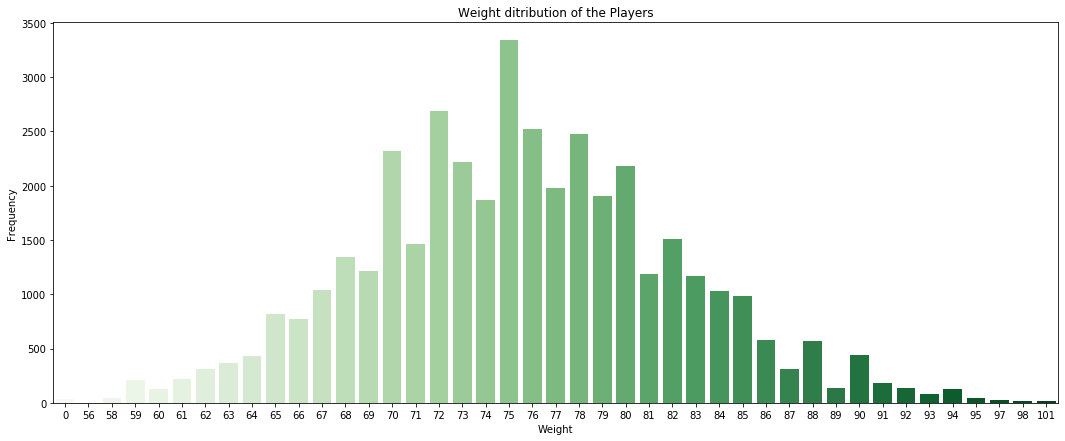

In [106]:
fig , ax = plt.subplots(figsize = (18,7))

sns.barplot(all_data['weight'].value_counts().index,all_data['weight'].value_counts().values, palette = 'Greens' )

plt.title("Weight ditribution of the Players")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.show()

In [146]:
# Number of goals scored by each player
goals_player = all_data.loc[all_data['Goal']==1, ['shortName', 'Goal']]
goals_player.sample(10)

,shortName,Goal
31621,G Higua u edn,1
10756,D Gayle,1
35870,G Sunu,1
26455,M Thuram,1
4792,C Wood,1
37538,M Arnautovi u,1
36472,L Milivojevi u,1
29844,S Zaza,1
9191,A Finnbogason,1
13533,H Mkhitaryan,1
